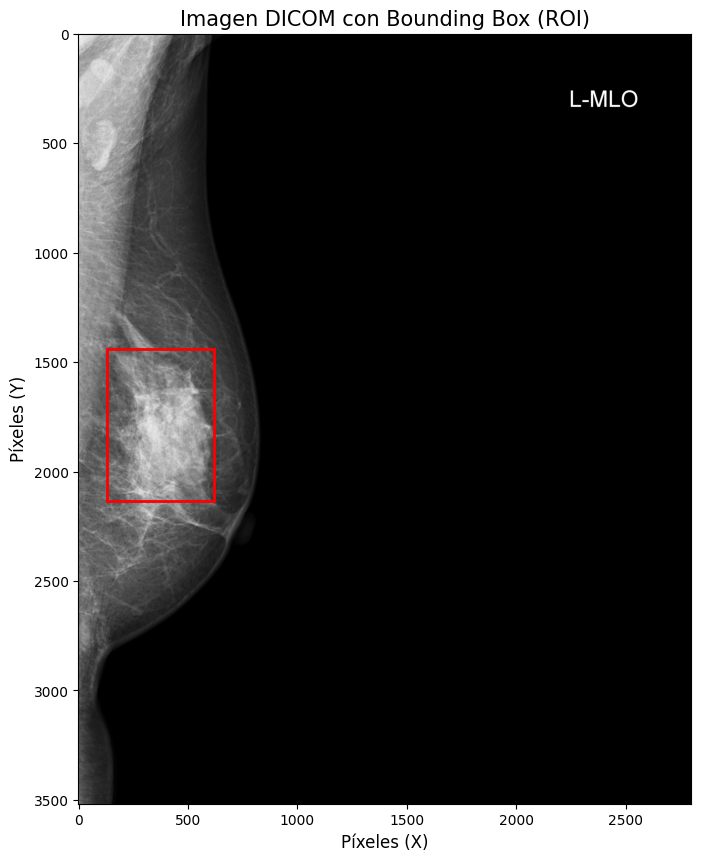

In [3]:
import os
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Ruta al CSV filtrado y la carpeta de imágenes DICOM
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'

# Cargar el CSV filtrado
filtered_df = pd.read_csv(filtered_csv_path)

# Función para obtener la ruta del archivo DICOM usando SOP Instance UID
def get_dicom_path(sop_instance_uid):
    for study_id in os.listdir(dicom_root):
        study_path = os.path.join(dicom_root, study_id)
        if os.path.isdir(study_path):
            dicom_path = os.path.join(study_path, sop_instance_uid + '.dicom')
            if os.path.exists(dicom_path):
                return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para SOP Instance UID: {sop_instance_uid}")

# Función para mostrar la imagen DICOM y añadir una bounding box
def show_dicom_image_with_bbox(dicom_path, findings):
    dicom = pydicom.dcmread(dicom_path)
    img = apply_voi_lut(dicom.pixel_array, dicom)
    
    # Crear la figura y los ejes para la visualización en grande
    fig, ax = plt.subplots(figsize=(10, 10))  # Imagen grande

    # Mostrar la imagen en escala de grises
    ax.imshow(img, cmap='gray')

    # Añadir bounding box para el primer finding de la imagen
    if not findings.empty:
        row = findings.iloc[0]  # Tomar la primera fila de findings
        x1, y1 = int(row['xmin']), int(row['ymin'])
        x2, y2 = int(row['xmax']), int(row['ymax'])

        # Calcular el ancho y alto del rectángulo (ROI)
        width, height = x2 - x1, y2 - y1

        # Crear un rectángulo con las coordenadas de la ROI
        rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    # Etiquetar los ejes
    ax.set_xlabel('Píxeles (X)', fontsize=12)
    ax.set_ylabel('Píxeles (Y)', fontsize=12)

    # Añadir un título a la imagen
    ax.set_title('Imagen DICOM con Bounding Box (ROI)', fontsize=15)

    # Mostrar la imagen con bounding box
    plt.show()

# Seleccionar una imagen al azar de MONOCHROME2
random_row = filtered_df[filtered_df['Photometric Interpretation'] == 'MONOCHROME2'].sample(1).iloc[0]

# Obtener el SOP Instance UID y el nombre de la imagen
sop_uid = random_row['SOP Instance UID']
image_name = random_row['image_id']

# Obtener la ruta DICOM para la imagen seleccionada
dicom_path = get_dicom_path(sop_uid)

# Filtrar los findings correspondientes a esa imagen
findings = filtered_df[filtered_df['image_id'] == image_name]

# Mostrar la imagen DICOM con el bounding box
show_dicom_image_with_bbox(dicom_path, findings)


In [8]:
import os
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Ruta al CSV filtrado y la carpeta de imágenes DICOM
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'

# Cargar el CSV filtrado
filtered_df = pd.read_csv(filtered_csv_path)

# Función para obtener la ruta del archivo DICOM usando SOP Instance UID
def get_dicom_path(sop_instance_uid):
    for study_id in os.listdir(dicom_root):
        study_path = os.path.join(dicom_root, study_id)
        if os.path.isdir(study_path):
            dicom_path = os.path.join(study_path, sop_instance_uid + '.dicom')
            if os.path.exists(dicom_path):
                return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para SOP Instance UID: {sop_instance_uid}")

# Función para mostrar la imagen DICOM y añadir una bounding box
def show_dicom_image_with_bbox(dicom_path, findings, title):
    dicom = pydicom.dcmread(dicom_path)
    img = apply_voi_lut(dicom.pixel_array, dicom)
    
    # Crear la figura y los ejes para la visualización en grande
    fig, ax = plt.subplots(figsize=(10, 10))  # Imagen grande

    # Mostrar la imagen en escala de grises
    ax.imshow(img, cmap='gray')

    # Añadir bounding box para los findings de la imagen
    if not findings.empty:
        for _, row in findings.iterrows():
            x1, y1 = int(row['xmin']), int(row['ymin'])
            x2, y2 = int(row['xmax']), int(row['ymax'])

            # Calcular el ancho y alto del rectángulo (ROI)
            width, height = x2 - x1, y2 - y1

            # Crear un rectángulo con las coordenadas de la ROI
            rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

    # Etiquetar los ejes
    ax.set_xlabel('Píxeles (X)', fontsize=12)
    ax.set_ylabel('Píxeles (Y)', fontsize=12)

    # Añadir un título a la imagen
    ax.set_title(title, fontsize=15)

    # Mostrar la imagen con bounding box
    plt.show()

# Filtrar por la categoría 'Mass' y seleccionar una imagen al azar
mass_df = filtered_df[filtered_df['finding_categories'] == 'Mass']

if mass_df.empty:
    print("No se encontraron imágenes con la categoría 'Mass'")
else:
    mass_row = mass_df.sample(1).iloc[0]
    sop_uid_mass = mass_row['SOP Instance UID']
    image_name_mass = mass_row['image_id']
    
    # Obtener la ruta DICOM para la imagen con categoría 'Mass'
    dicom_path_mass = get_dicom_path(sop_uid_mass)
    
    # Filtrar los findings correspondientes a la imagen de categoría 'Mass'
    findings_mass = filtered_df[filtered_df['image_id'] == image_name_mass]
    
    # Mostrar la imagen DICOM con el bounding box de categoría 'Mass'
    show_dicom_image_with_bbox(dicom_path_mass, findings_mass, 'Imagen con categoría Mass')

# Filtrar por la categoría 'Suspicious Calcification' y seleccionar una imagen al azar
suspicious_df = filtered_df[filtered_df['finding_categories'] == 'Suspicious Calcification']

if suspicious_df.empty:
    print("No se encontraron imágenes con la categoría 'Suspicious Calcification'")
else:
    suspicious_row = suspicious_df.sample(1).iloc[0]
    sop_uid_suspicious = suspicious_row['SOP Instance UID']
    image_name_suspicious = suspicious_row['image_id']
    
    # Obtener la ruta DICOM para la imagen con categoría 'Suspicious Calcification'
    dicom_path_suspicious = get_dicom_path(sop_uid_suspicious)
    
    # Filtrar los findings correspondientes a la imagen de categoría 'Suspicious Calcification'
    findings_suspicious = filtered_df[filtered_df['image_id'] == image_name_suspicious]
    
    # Mostrar la imagen DICOM con el bounding box de categoría 'Suspicious Calcification'
    show_dicom_image_with_bbox(dicom_path_suspicious, findings_suspicious, 'Imagen con categoría Suspicious Calcification')


No se encontraron imágenes con la categoría 'Mass'
No se encontraron imágenes con la categoría 'Suspicious Calcification'


In [1]:
import os
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Ruta al CSV filtrado y la carpeta de imágenes DICOM
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'

# Cargar el CSV filtrado
filtered_df = pd.read_csv(filtered_csv_path)

# Función para obtener la ruta del archivo DICOM usando SOP Instance UID
def get_dicom_path(sop_instance_uid):
    for study_id in os.listdir(dicom_root):
        study_path = os.path.join(dicom_root, study_id)
        if os.path.isdir(study_path):
            dicom_path = os.path.join(study_path, sop_instance_uid + '.dicom')
            if os.path.exists(dicom_path):
                return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para SOP Instance UID: {sop_instance_uid}")

# Función para mostrar la imagen DICOM y añadir una bounding box
def show_dicom_image_with_bbox(dicom_path, findings, ax):
    dicom = pydicom.dcmread(dicom_path)
    img = apply_voi_lut(dicom.pixel_array, dicom)
    
    # Mostrar la imagen con VOI LUT
    ax.imshow(img, cmap='gray')

    # Añadir bounding box para los findings de la imagen
    for idx, row in findings.iterrows():
        x1, y1 = int(row['xmin']), int(row['ymin'])
        x2, y2 = int(row['xmax']), int(row['ymax'])

        # Calcular el ancho y alto del rectángulo (ROI)
        width, height = x2 - x1, y2 - y1

        # Crear un rectángulo con las coordenadas de la ROI
        rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    # Configurar etiquetas de los ejes
    ax.set_xlabel('Píxeles (X)')
    ax.set_ylabel('Píxeles (Y)')

# Filtrar una imagen con masas
mass_row = filtered_df[filtered_df['finding_categories'] == 'Mass'].sample(1).iloc[0]
sop_uid_mass = mass_row['SOP Instance UID']
image_name_mass = mass_row['image_name']

# Filtrar una imagen con calcificaciones
calc_row = filtered_df[filtered_df['finding_categories'] == 'Suspicious Calcification'].sample(1).iloc[0]
sop_uid_calc = calc_row['SOP Instance UID']
image_name_calc = calc_row['image_name']

# Obtener las rutas DICOM para las imágenes seleccionadas
dicom_path_mass = get_dicom_path(sop_uid_mass)
dicom_path_calc = get_dicom_path(sop_uid_calc)

# Filtrar los findings correspondientes a cada imagen
findings_mass = filtered_df[filtered_df['image_name'] == image_name_mass]
findings_calc = filtered_df[filtered_df['image_name'] == image_name_calc]

# Crear figuras y mostrar las imágenes con las ROIs
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Mostrar la imagen con masa
show_dicom_image_with_bbox(dicom_path_mass, findings_mass, axes[0])
axes[0].set_title(f"Imagen con masa: {image_name_mass}")

# Mostrar la imagen con calcificaciones
show_dicom_image_with_bbox(dicom_path_calc, findings_calc, axes[1])
axes[1].set_title(f"Imagen con calcificación: {image_name_calc}")

plt.tight_layout()
plt.show()


ValueError: a must be greater than 0 unless no samples are taken

In [2]:
import os
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Ruta al CSV filtrado y la carpeta de imágenes DICOM
filtered_csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'

# Cargar el CSV filtrado
filtered_df = pd.read_csv(filtered_csv_path)

# Función para obtener la ruta del archivo DICOM usando SOP Instance UID
def get_dicom_path(sop_instance_uid):
    for study_id in os.listdir(dicom_root):
        study_path = os.path.join(dicom_root, study_id)
        if os.path.isdir(study_path):
            dicom_path = os.path.join(study_path, sop_instance_uid + '.dicom')
            if os.path.exists(dicom_path):
                return dicom_path
    raise FileNotFoundError(f"No se encontró el archivo DICOM para SOP Instance UID: {sop_instance_uid}")

# Función para mostrar la imagen DICOM y añadir una bounding box
def show_dicom_image_with_bbox(dicom_path, findings, ax):
    dicom = pydicom.dcmread(dicom_path)
    img = apply_voi_lut(dicom.pixel_array, dicom)
    
    # Mostrar la imagen con VOI LUT
    ax.imshow(img, cmap='gray')

    # Añadir bounding box para los findings de la imagen
    for idx, row in findings.iterrows():
        x1, y1 = int(row['xmin']), int(row['ymin'])
        x2, y2 = int(row['xmax']), int(row['ymax'])

        # Calcular el ancho y alto del rectángulo (ROI)
        width, height = x2 - x1, y2 - y1

        # Crear un rectángulo con las coordenadas de la ROI
        rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    # Configurar etiquetas de los ejes
    ax.set_xlabel('Píxeles (X)')
    ax.set_ylabel('Píxeles (Y)')

# Función para mostrar una imagen con masas y otra con calcificaciones
def show_mass_and_calcification_images():
    # Filtrar una imagen con masas
    mass_df = filtered_df[filtered_df['finding_categories'] == 'Mass']
    
    if not mass_df.empty:
        mass_row = mass_df.sample(1).iloc[0]
        sop_uid_mass = mass_row['SOP Instance UID']
        image_name_mass = mass_row['image_name']

        # Obtener la ruta DICOM y mostrar la imagen con masas
        dicom_path_mass = get_dicom_path(sop_uid_mass)
        findings_mass = filtered_df[filtered_df['image_name'] == image_name_mass]

        fig, ax = plt.subplots(figsize=(7, 7))
        show_dicom_image_with_bbox(dicom_path_mass, findings_mass, ax)
        ax.set_title(f"Imagen con masa: {image_name_mass}")
        plt.show()
    else:
        print("No se encontraron imágenes con masas.")

    # Filtrar una imagen con calcificaciones
    calc_df = filtered_df[filtered_df['finding_categories'] == 'Suspicious Calcification']
    
    if not calc_df.empty:
        calc_row = calc_df.sample(1).iloc[0]
        sop_uid_calc = calc_row['SOP Instance UID']
        image_name_calc = calc_row['image_name']

        # Obtener la ruta DICOM y mostrar la imagen con calcificaciones
        dicom_path_calc = get_dicom_path(sop_uid_calc)
        findings_calc = filtered_df[filtered_df['image_name'] == image_name_calc]

        fig, ax = plt.subplots(figsize=(7, 7))
        show_dicom_image_with_bbox(dicom_path_calc, findings_calc, ax)
        ax.set_title(f"Imagen con calcificación: {image_name_calc}")
        plt.show()
    else:
        print("No se encontraron imágenes con calcificaciones.")

# Ejecutar la visualización
show_mass_and_calcification_images()


No se encontraron imágenes con masas.
No se encontraron imágenes con calcificaciones.
